In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.1.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

(60000, 28, 28)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(train_labels)

60000

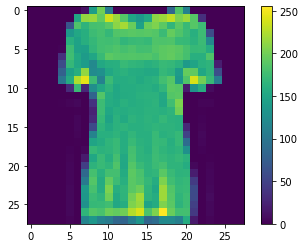

In [4]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

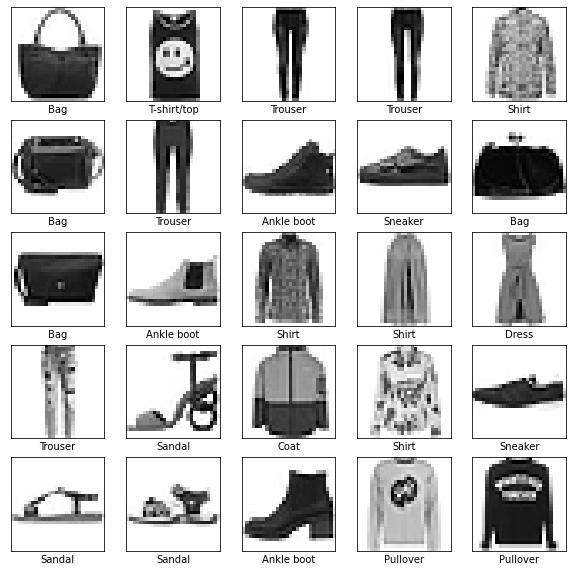

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+100]])
plt.show()

In [6]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10)])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4941 - accuracy: 0.8276
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3737 - accuracy: 0.8662
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3341 - accuracy: 0.8783
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3122 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2970 - accuracy: 0.8897
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2820 - accuracy: 0.8951
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2699 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2603 - accuracy: 0.9035
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2493 - accuracy: 0.9069
Epoch 10/10
60

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3486 - accuracy: 0.8799

Test accuracy: 0.8799


In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.0761863e-09, 4.6344456e-12, 1.8850031e-11, 1.1549373e-11,
       4.5009860e-11, 1.4926884e-05, 3.3971435e-09, 1.8895661e-03,
       9.5351560e-10, 9.9809545e-01], dtype=float32)

In [10]:
np.argmax(predictions[0])

9

In [11]:
test_labels[0]

9

In [12]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color))

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

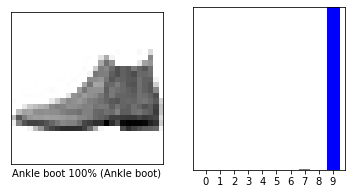

In [13]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

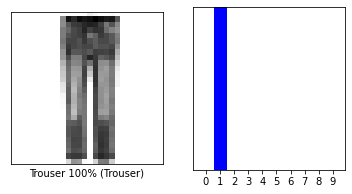

In [14]:
i = 15
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

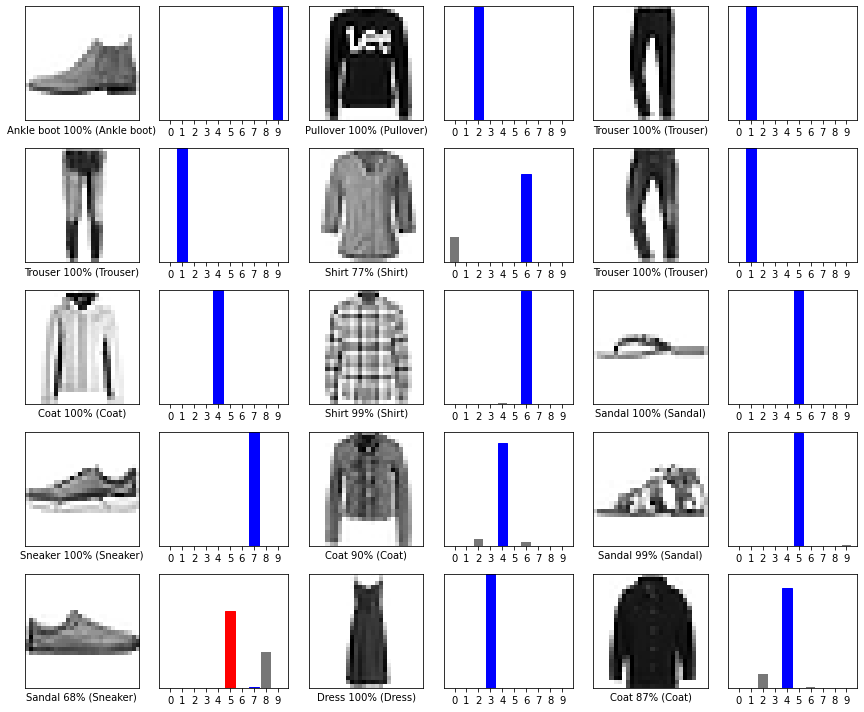

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [16]:
img = test_images[1]
print(img.shape)

(28, 28)


In [17]:
img = np.expand_dims(img, 0)
print(img.shape)

(1, 28, 28)


In [18]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.7958424e-04 1.3607549e-14 9.9548447e-01 2.9184238e-07 3.0477543e-03
  4.5283860e-10 1.2880068e-03 5.1778380e-17 3.5713172e-11 1.7591300e-12]]


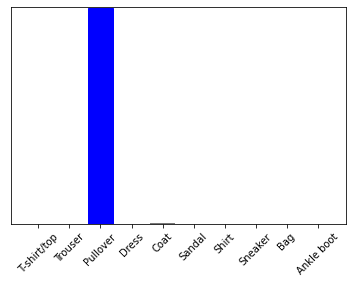

In [19]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [20]:
np.argmax(predictions_single[0])

2